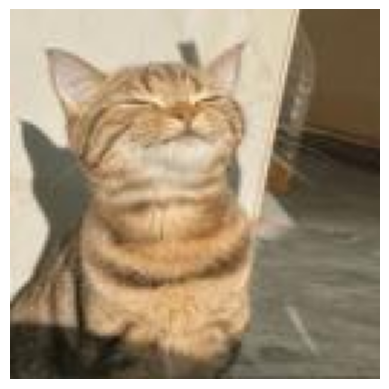

In [31]:
from google.colab import drive
import matplotlib.pyplot as plt
import cv2

# Шлях до папки з зображеннями
image_path = './drive/MyDrive/data/Cat/8b0b6ec260a4c1d2b3e579f96590bb7f.jpg'

# Зчитування та відображення зображення
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [32]:
import os

dataset_path = './drive/MyDrive/data/Cat'

# Дозволені розширення
allowed_extensions = {'jpeg', 'jpg', 'bmp', 'png'}

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if not file.split('.')[-1].lower() in allowed_extensions:
            os.remove(os.path.join(root, file))

In [33]:
from PIL import Image

dataset_path = './drive/MyDrive/data'
allowed_extensions = {'jpeg', 'jpg', 'bmp', 'png'}
img_height = 128
img_width = 128

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        file_extension = file.split('.')[-1].lower()
        if file_extension not in allowed_extensions:
            os.remove(os.path.join(root, file))
        else:
            img_path = os.path.join(root, file)
            with Image.open(img_path) as img:
                img = img.resize((img_width, img_height))
                img.save(img_path)

In [34]:
import tensorflow as tf

batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 191 files belonging to 2 classes.
Using 153 files for training.
Found 191 files belonging to 2 classes.
Using 38 files for validation.


In [35]:
train_ds_np = train_ds.as_numpy_iterator()
val_ds_np = val_ds.as_numpy_iterator()

In [36]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [37]:
test_ds = normalized_val_ds.take(1)
val_ds = normalized_val_ds.skip(1)

In [38]:

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
log_dir = './drive/MyDrive/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(
    normalized_train_ds,
    validation_data=val_ds,
    epochs=10
)

# Тестування моделі
test_loss, test_acc = model.evaluate(test_ds)

Epoch 1/10
5/5 [==============================] - 4s 367ms/step - loss: 0.8286 - accuracy: 0.4575 - val_loss: 0.7140 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 2s 338ms/step - loss: 0.7076 - accuracy: 0.4837 - val_loss: 0.6965 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 2s 317ms/step - loss: 0.6837 - accuracy: 0.6471 - val_loss: 0.6429 - val_accuracy: 0.8333
Epoch 4/10
5/5 [==============================] - 2s 319ms/step - loss: 0.6659 - accuracy: 0.5359 - val_loss: 0.6990 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 2s 395ms/step - loss: 0.6598 - accuracy: 0.5294 - val_loss: 0.6472 - val_accuracy: 0.6667
Epoch 6/10
5/5 [==============================] - 3s 578ms/step - loss: 0.6153 - accuracy: 0.7320 - val_loss: 0.6095 - val_accuracy: 0.6667
Epoch 7/10
5/5 [==============================] - 2s 329ms/step - loss: 0.5651 - accuracy: 0.8366 - val_loss: 0.4389 - val_accuracy: 1.0000
Epoch 8/10
5/5 [====